In [7]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn import model_selection
from sklearn import neighbors
from sklearn import datasets
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn import cluster
from sklearn import decomposition

In [8]:
y_blind=pd.read_csv('hw2_problem_4_y_blind.csv')
y_blind=np.array(y_blind.values[:,1:], dtype=np.float64)

y_blind_pred = pd.read_csv('hw2_problem_4_y_blind_predict.csv')
y_blind_pred = np.array(y_blind_pred.values[:,1:], dtype=np.float64)

mse = mean_squared_error(y_blind, y_blind_pred)
print(mse)

1.0839265584804156


Looks reasonable compared to 1.3

In [31]:
y_blind = pd.read_csv('hw2_problem_5_y_blind.csv')
y_blind = np.array(y_blind.values[:,1],dtype=np.float64)
y_blind_pred = pd.read_csv('hw2_problem_5_y_blind_predict.csv')
y_blind_pred = np.array(y_blind_pred.values[:,1],dtype=np.float64)
fpr, tpr, th = metrics.roc_curve(y_blind, y_blind_pred)
roc_auc = metrics.auc(fpr, tpr)

print(roc_auc)

0.8260018424689083


Slightly less than expected value 0.91.

Question 3

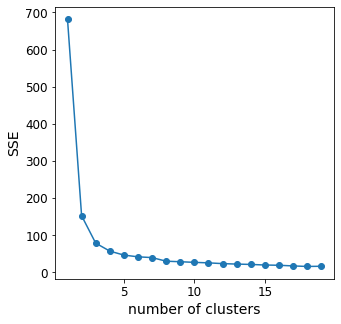

In [41]:
data = load_iris(return_X_y=False)
X = data.data
y = data.target

sse=[]
for k in range(1,20):
    kmeans=cluster.MiniBatchKMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
fig=plt.figure(figsize=[5,5])
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.plot(range(1,20), sse, marker = 'o')
plt.show()

The number of clusters I choose is 8 where after this point, increase in number of clusters does not give much better result (in percentage differences). 

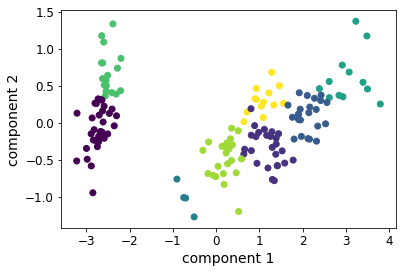

In [42]:
kmeans=cluster.MiniBatchKMeans(n_clusters=8)
kmeans.fit(X)
label_pred = kmeans.labels_
pca=decomposition.PCA(n_components=2)
pca.fit(X)
reduced_X=pca.fit_transform(X)
feature_1=reduced_X[:,0]
feature_2=reduced_X[:,1]
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.scatter(feature_1, feature_2, c=label_pred)

There are clear divisions between each cluster, and the graph looks reasonable.

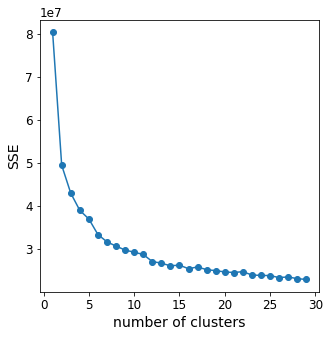

In [45]:
X = pd.read_csv('hw3_physio.csv')
X=np.array(X.values[:,1:],dtype=np.float64)

see = []
sse=[]
for k in range(1,30):
    kmeans=cluster.MiniBatchKMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
fig=plt.figure(figsize=[5,5])
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.plot(range(1,30), sse, marker = 'o')
plt.show()

The number of clusters I choose in this case would be around 18 as further increase in number of clusters does not give much better result.

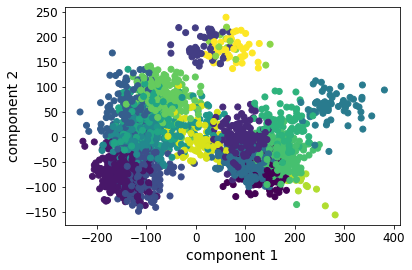

In [46]:
kmeans=cluster.MiniBatchKMeans(n_clusters=18)
kmeans.fit(X)
label_pred = kmeans.labels_
pca=decomposition.PCA(n_components=2)
pca.fit(X)
reduced_X=pca.fit_transform(X)
feature_1=reduced_X[:,0]
feature_2=reduced_X[:,1]
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.scatter(feature_1, feature_2, c=label_pred)

The divisions are not as clear as those in Iris dataset. I guess this might be caused by more number of clusters added and therefore resulting overlaps. Indeed if I try n_clusters = 3, the divisions are clearer but SSE is higher.

Question 4

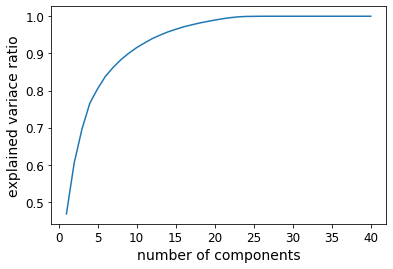

In [48]:
X = pd.read_csv('hw3_physio.csv')
X = np.array(X.values[:,1:],dtype=np.float64)

pca=decomposition.PCA(n_components=40)
pca.fit(X)
components=pca.components_
var = pca.explained_variance_ratio_
plt.plot(np.arange(1,41), np.cumsum(var))
plt.xlabel('number of components')
plt.ylabel('explained variace ratio')
plt.show()

I would choose n_components = 22 in this case. As the future increase in components does not give much better result.

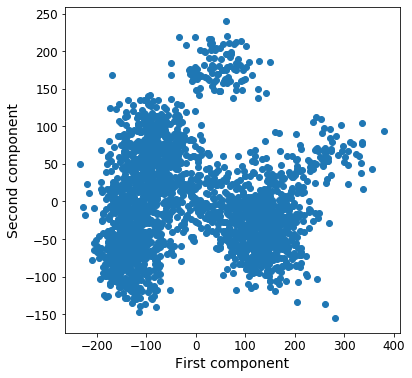

In [49]:
pca = decomposition.PCA(n_components=22)
pca.fit(X)
X_pca_2 = pca.transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

Question 5

In [54]:
X = pd.read_csv('hw3_problem_5_X.csv')
X = np.array(X.values[:,1:],dtype=np.float64)

y = pd.read_csv('hw3_problem_5_y.csv')
y = np.array(y.values[:,1:],dtype=np.float64)

X_blind = pd.read_csv('hw3_problem_5_X_blind.csv')
X_blind = np.array(X_blind.values[:,1:],dtype=np.float64)

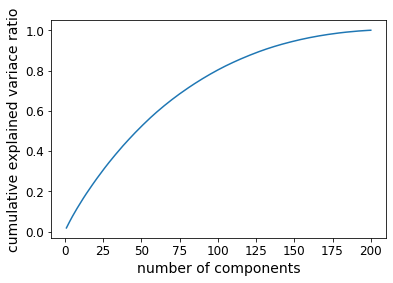

In [57]:
pca=decomposition.PCA(n_components=200)
pca.fit(X)
components=pca.components_
var = pca.explained_variance_ratio_
plt.plot(np.arange(1,201), np.cumsum(var))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variace ratio')
plt.show()

According to Elbow's method, I would choose n_components = 100 in this case, for it is the point where the cumulative explained variance ratio reaches 80%.

In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
pca = decomposition.PCA(n_components = 100)
svc = svm.SVC()
pipe=pipeline.Pipeline([('pca',pca), ('svm',svc)])


param_grid = {'svm__C': (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000),
        'svm__gamma': (0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000)}
result = GridSearchCV(pipe, param_grid, scoring='roc_auc')
result = result.fit(X, y)
print(result.best_params_)
print(result.best_score_)

pca = decomposition.PCA(n_components = 100)
svc = svm.SVC(gamma = 0.001, C = 0.001)
pipe = pipeline.Pipeline([('pca',pca), ('svm',svc)])
pipe.fit(X,y)
y_blind_pred = pipe.predict(X_blind)

y_blind_pre = pd.DataFrame(y_blind_pred)
y_blind_pre.to_csv('./hw3_problem_5_y_blind_predict_thumb.csv')

{'svm__C': 0.001, 'svm__gamma': 0.001}
0.6104277180406212


In [60]:
pca = decomposition.PCA(n_components = 100)
svc = svm.SVC()
pipe=pipeline.Pipeline([('pca',pca), ('svm',svc)])


param_grid = {'pca__n_components': [1,100],
              'svm__C': [0.0001, 1000],
              'svm__gamma': [0.00001, 5000]
         }
result = GridSearchCV(pipe, param_grid, scoring='roc_auc')
result = result.fit(X, y)
print(result.best_params_)
print(result.best_score_)

pca = decomposition.PCA(n_components = 100)
svc = svm.SVC(gamma = 0.001, C = 0.00001)
pipe = pipeline.Pipeline([('pca',pca), ('svm',svc)])
pipe.fit(X,y)
y_blind_pred = pipe.predict(X_blind)

y_blind_pre = pd.DataFrame(y_blind_pred)
y_blind_pre.to_csv('./hw3_problem_5_y_blind_predict_valid.csv')

{'pca__n_components': 100, 'svm__C': 0.0001, 'svm__gamma': 1e-05}
0.7500638334186721


Question 6

1. I took about 30 hours.

2. I adhered to the Duke Community Standard in the completion of this assignment.